***22MCB0030 SARTHAK TRIPATHI***    

***SOCIAL NETWORK AND ANALYSIS***

  ***ASSIGNMENT - 2***

***COMMUNITY DETECTION ALGORITHIMS***

***Louvain’s Algorithm for Community Detection***

In [21]:
import random
import networkx as nx
import numpy as np
from community import community_louvain
import matplotlib.pyplot as plt

Number of nodes: 500
Number of edges: 29402


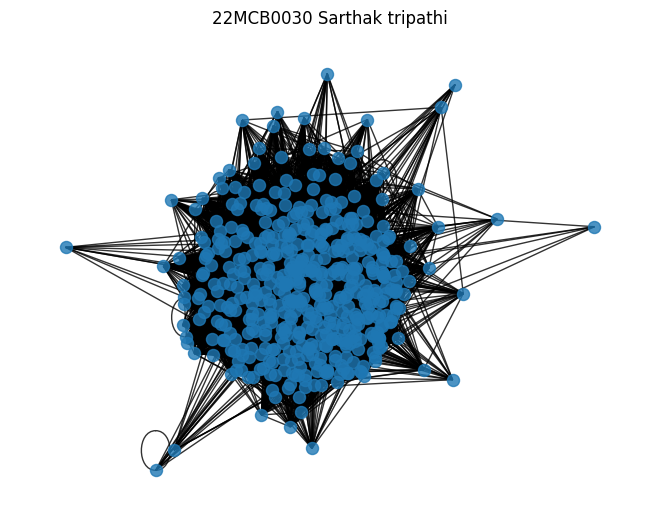

In [22]:
def generate_network(n=10):
    '''
    This function will generate a random weighted network associated to the user specifed
    number of nodes. 
    
    params:
        n (Integer) : The number of nodes you want in your network
    
    returns:
        A networkX multi-graph
        
    example:
        G = generate_network(n)
    '''
    # initialize dictionary with nodes
    graph_dct = {node:[] for node in range(n)}
    nodes = list(range(n))
    
    # generate edges
    for n,edge_list in graph_dct.items():
        edge_c = random.randint(min(nodes), int(max(nodes) / 2))
        el = random.sample(nodes, edge_c)
        graph_dct[n] = el
    
    # create networkx multi-edge graph
    G = nx.MultiGraph(graph_dct)
    return G

n = 500
G = generate_network(n)
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# visualize graph
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8)
plt.title("22MCB0030 Sarthak tripathi")
plt.show()

In [23]:
comms = community_louvain.best_partition(G)

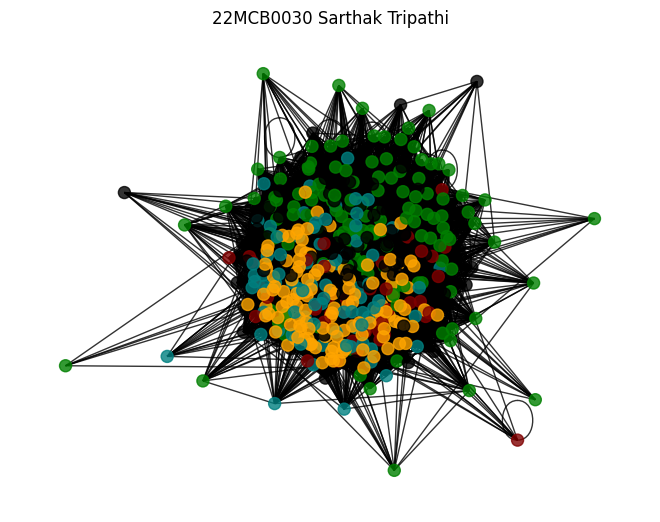

In [24]:
unique_coms = np.unique(list(comms.values()))
cmap = {
    0 : 'maroon',
    1 : 'teal',
    2 : 'black', 
    3 : 'orange',
    4 : 'green',
    5 : 'yellow'
}

node_cmap = [cmap[v] for _,v in comms.items()]

pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8, node_color=node_cmap)
plt.title("22MCB0030 Sarthak Tripathi")
plt.show()

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

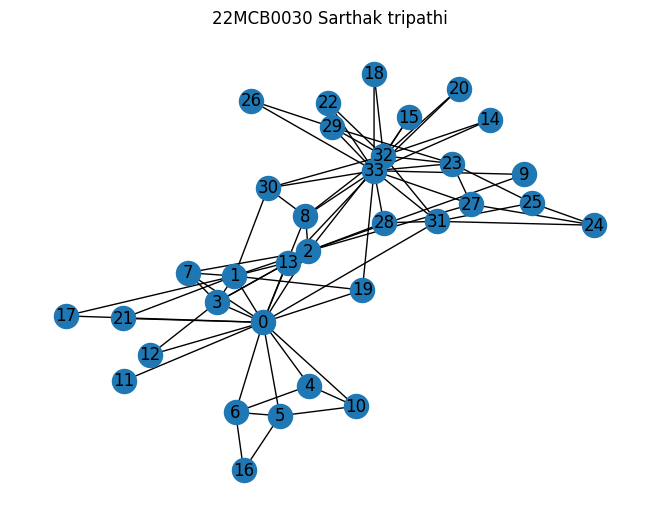

In [26]:
# load the graph
G = nx.karate_club_graph()

# visualize the graph
nx.draw(G, with_labels = True)
plt.title("22MCB0030 Sarthak tripathi")
plt.show()

In [27]:
len(G.nodes), len(G.edges)

(34, 78)

In [29]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

In [30]:
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [31]:
# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

In [32]:
print(node_groups)

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


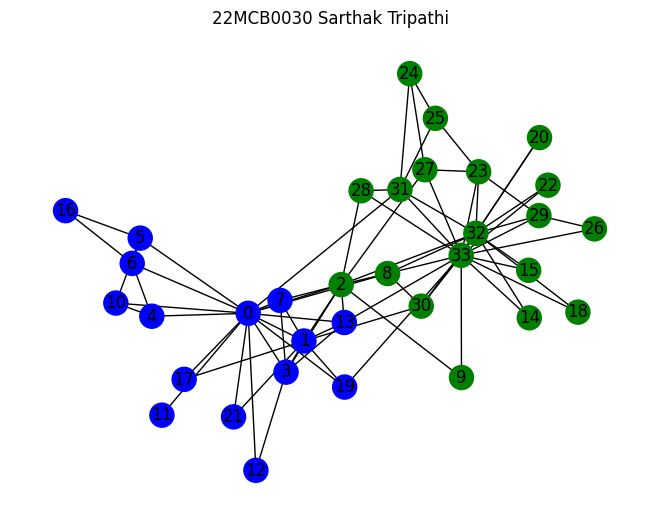

In [33]:
# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.title("22MCB0030 Sarthak Tripathi")
plt.show()